# Research Question
Establish correlation of individuals' mobility and community infection rates.
Additional questions:
(1) How do lengths of distances affect correlation?
(2) Do mask mandates mitigate correlation?

# Load Data

In [33]:
# load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
# load data
raw_data = pd.read_csv('Trips_by_Distance.csv')
raw_data['Date'] = pd.to_datetime(raw_data['Date'])

# Data Inspection & Visualization

In [56]:
# show columns - keys()
#raw_data.keys()
raw_data.columns

Index(['Level', 'Date', 'State FIPS', 'State Postal Code', 'County FIPS',
       'County Name', 'Population Staying at Home',
       'Population Not Staying at Home', 'Number of Trips',
       'Number of Trips <1', 'Number of Trips 1-3', 'Number of Trips 3-5',
       'Number of Trips 5-10', 'Number of Trips 10-25',
       'Number of Trips 25-50', 'Number of Trips 50-100',
       'Number of Trips 100-250', 'Number of Trips 250-500',
       'Number of Trips >=500'],
      dtype='object')

In [57]:
#show first 5 rows
raw_data.head()

,Level,Date,State FIPS,State Postal Code,County FIPS,County Name,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,Number of Trips 1-3,Number of Trips 3-5,Number of Trips 5-10,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500
0,County,2020-07-06,1.0,AL,1001.0,Autauga County,10037.0,45564.0,153720.0,34877.0,36225.0,19325.0,22358.0,28807.0,7093.0,3443.0,1209.0,351.0,32.0
1,County,2020-07-06,1.0,AL,1003.0,Baldwin County,42138.0,175884.0,547365.0,104145.0,139705.0,69655.0,87790.0,93527.0,31928.0,9353.0,7697.0,3188.0,377.0
2,County,2020-07-06,1.0,AL,1005.0,Barbour County,4039.0,20842.0,74391.0,13459.0,18463.0,10155.0,10947.0,11129.0,6185.0,3292.0,625.0,136.0,0.0
3,County,2020-07-06,1.0,AL,1007.0,Bibb County,3508.0,18892.0,59988.0,13862.0,14007.0,6884.0,7900.0,7704.0,7061.0,1501.0,840.0,174.0,55.0
4,County,2020-07-06,1.0,AL,1009.0,Blount County,8388.0,49452.0,170776.0,32254.0,36403.0,21186.0,25098.0,29347.0,19206.0,5148.0,1542.0,419.0,173.0


In [58]:
#show last 5 rows
raw_data.tail()

,Level,Date,State FIPS,State Postal Code,County FIPS,County Name,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,Number of Trips 1-3,Number of Trips 3-5,Number of Trips 5-10,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500
1804605,County,2019-12-26,13.0,GA,13059.0,Clarke County,30279.0,96662.0,351579.0,65734.0,102365.0,57920.0,52488.0,35734.0,26689.0,5304.0,3813.0,1191.0,341.0
1804606,County,2019-12-26,13.0,GA,13061.0,Clay County,598.0,2280.0,7073.0,521.0,850.0,675.0,2114.0,1528.0,988.0,241.0,16.0,140.0,0.0
1804607,County,2019-12-26,13.0,GA,13063.0,Clayton County,64596.0,224134.0,782107.0,173364.0,148994.0,84764.0,128033.0,165146.0,48683.0,14902.0,13008.0,3915.0,1298.0
1804608,County,2019-12-26,13.0,GA,13065.0,Clinch County,894.0,5734.0,17653.0,2835.0,3299.0,1584.0,2249.0,2824.0,4149.0,564.0,81.0,64.0,4.0
1804609,County,2019-12-26,13.0,GA,13067.0,Cobb County,168225.0,586327.0,2117630.0,423318.0,459698.0,244645.0,372193.0,437848.0,110589.0,27716.0,29789.0,7283.0,4551.0


In [59]:
#show row, column
raw_data.shape

(1804610, 19)

In [60]:
#show distinct values in state region
raw_data['State Postal Code'].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY', nan], dtype=object)

In [61]:
#show distinct dates in time series
raw_data['Date'].unique()

array(['2020-07-06T00:00:00.000000000', '2020-07-07T00:00:00.000000000',
       '2020-07-08T00:00:00.000000000', '2020-07-09T00:00:00.000000000',
       '2020-07-10T00:00:00.000000000', '2020-07-11T00:00:00.000000000',
       '2020-07-12T00:00:00.000000000', '2020-07-13T00:00:00.000000000',
       '2020-07-14T00:00:00.000000000', '2020-07-15T00:00:00.000000000',
       '2020-07-16T00:00:00.000000000', '2020-07-17T00:00:00.000000000',
       '2020-07-18T00:00:00.000000000', '2019-01-21T00:00:00.000000000',
       '2019-04-15T00:00:00.000000000', '2019-05-27T00:00:00.000000000',
       '2019-07-07T00:00:00.000000000', '2019-03-04T00:00:00.000000000',
       '2019-08-18T00:00:00.000000000', '2019-11-09T00:00:00.000000000',
       '2019-09-29T00:00:00.000000000', '2019-11-10T00:00:00.000000000',
       '2019-07-08T00:00:00.000000000', '2019-03-05T00:00:00.000000000',
       '2019-01-22T00:00:00.000000000', '2019-08-19T00:00:00.000000000',
       '2019-03-06T00:00:00.000000000', '2019-05-28

In [62]:
# remove extraneous columns
mobility_df = raw_data[['Level','Date','State Postal Code','County Name','Population Staying at Home','Population Not Staying at Home','Number of Trips']].copy()
mobility_df.head()

,Level,Date,State Postal Code,County Name,Population Staying at Home,Population Not Staying at Home,Number of Trips
0,County,2020-07-06,AL,Autauga County,10037.0,45564.0,153720.0
1,County,2020-07-06,AL,Baldwin County,42138.0,175884.0,547365.0
2,County,2020-07-06,AL,Barbour County,4039.0,20842.0,74391.0
3,County,2020-07-06,AL,Bibb County,3508.0,18892.0,59988.0
4,County,2020-07-06,AL,Blount County,8388.0,49452.0,170776.0


In [63]:
al_mobility_df = mobility_df[mobility_df['State Postal Code']=='AL']
al_mobility_df.tail()

,Level,Date,State Postal Code,County Name,Population Staying at Home,Population Not Staying at Home,Number of Trips
1804252,County,2019-12-26,AL,Tuscaloosa County,43171.0,165101.0,546657.0
1804253,County,2019-12-26,AL,Walker County,11302.0,52214.0,221172.0
1804254,County,2019-12-26,AL,Washington County,1755.0,14573.0,47712.0
1804255,County,2019-12-26,AL,Wilcox County,1229.0,9366.0,36004.0
1804256,County,2019-12-26,AL,Winston County,3121.0,20467.0,72032.0


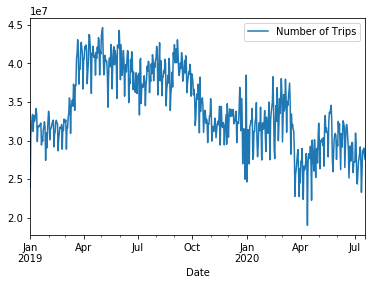

In [75]:
#visualize Alabama data
alabama = al_mobility_df[['Date','Number of Trips']]
plot_alabama = alabama.groupby(['Date'],as_index=False).agg({'Number of Trips': 'sum'})
plot_alabama.head()
plot_alabama.plot(x='Date')